<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Rubén Hernández Guevara | Andrés Hernández Jiménez.

**Fecha:** 09 de Marzo del 2021.

**Expediente** : 717710 | 717895.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Rub27182n/Proyecto-SPF.git
    
**Repositorio de Pruebas:** https://github.com/Rub27182n/Tests_Proyecto-SPF.git

# Proyecto TEMA-2

# <font color='midnightblue'> 1. Análisis y Simulación de Videos de Youtube

> En este proyecto, examinaremos a detalle y simularemos las variables más escenciales de un video de YouTube: Likes, Dislikes, Comments y Views para obtener los estadísticos más probables de un hipotético video.

# <font color='midnightblue'> 2 . Objetivos

> ###  <font color='midnightblue'> Generales
>> Consideramos como objetivo principal, el generar modelos/funciónes que permita simular satisfactoriamente los principales y característicos estadísticos de los videos de YouTube México; utilizando los máximos recursos  posibles aprendidos hasta el tema dos de la materia.
    
> ###  <font color='midnightblue'> Específicos
>> - Obtener la Función de Distribución de Probabilidad de cada estadístico.
>> - Simular cantidad de Likes, Dislikes, Comments y Views.
>> - Aplicar satisfactoriamente los temas vistos en clase.
>> - Encontrar propiedades estadísticas lo más parecidas posibles a los datos reales

# <font color='midnightblue'> 3.  Definición del Problema
    
> En este proyecto queremos plantear la idea de una compañía que opera con Data Science,  y que a través de una base de datos de videos de YouTube, le es posible obtener distribuciones de probabilidad y simular casos específicos de hipotéticos videos, a los cuales se pretende estimar su recibimiento (número de vistas, likes, dislikes y comentarios) en la plataforma. 
    
> Todos los datos que se utilizarán son datos reales de videos que han estado en la sección "Tendencias" en Youtube México. Con los 4 estadísticos previamente mencionados, se podrá obtener la información necesaria para evaluar las diferentes categorías de videos y su recibimiento en la plataforma a través de simulación Monte Carlo. Estos parámetros serán los nodos para trabajar específicamente y a través de estos se generarán datos que nos permiten cumplir con el objetivo central, examinar a detalle y simular las variables escenciales de un video de YouTube. 

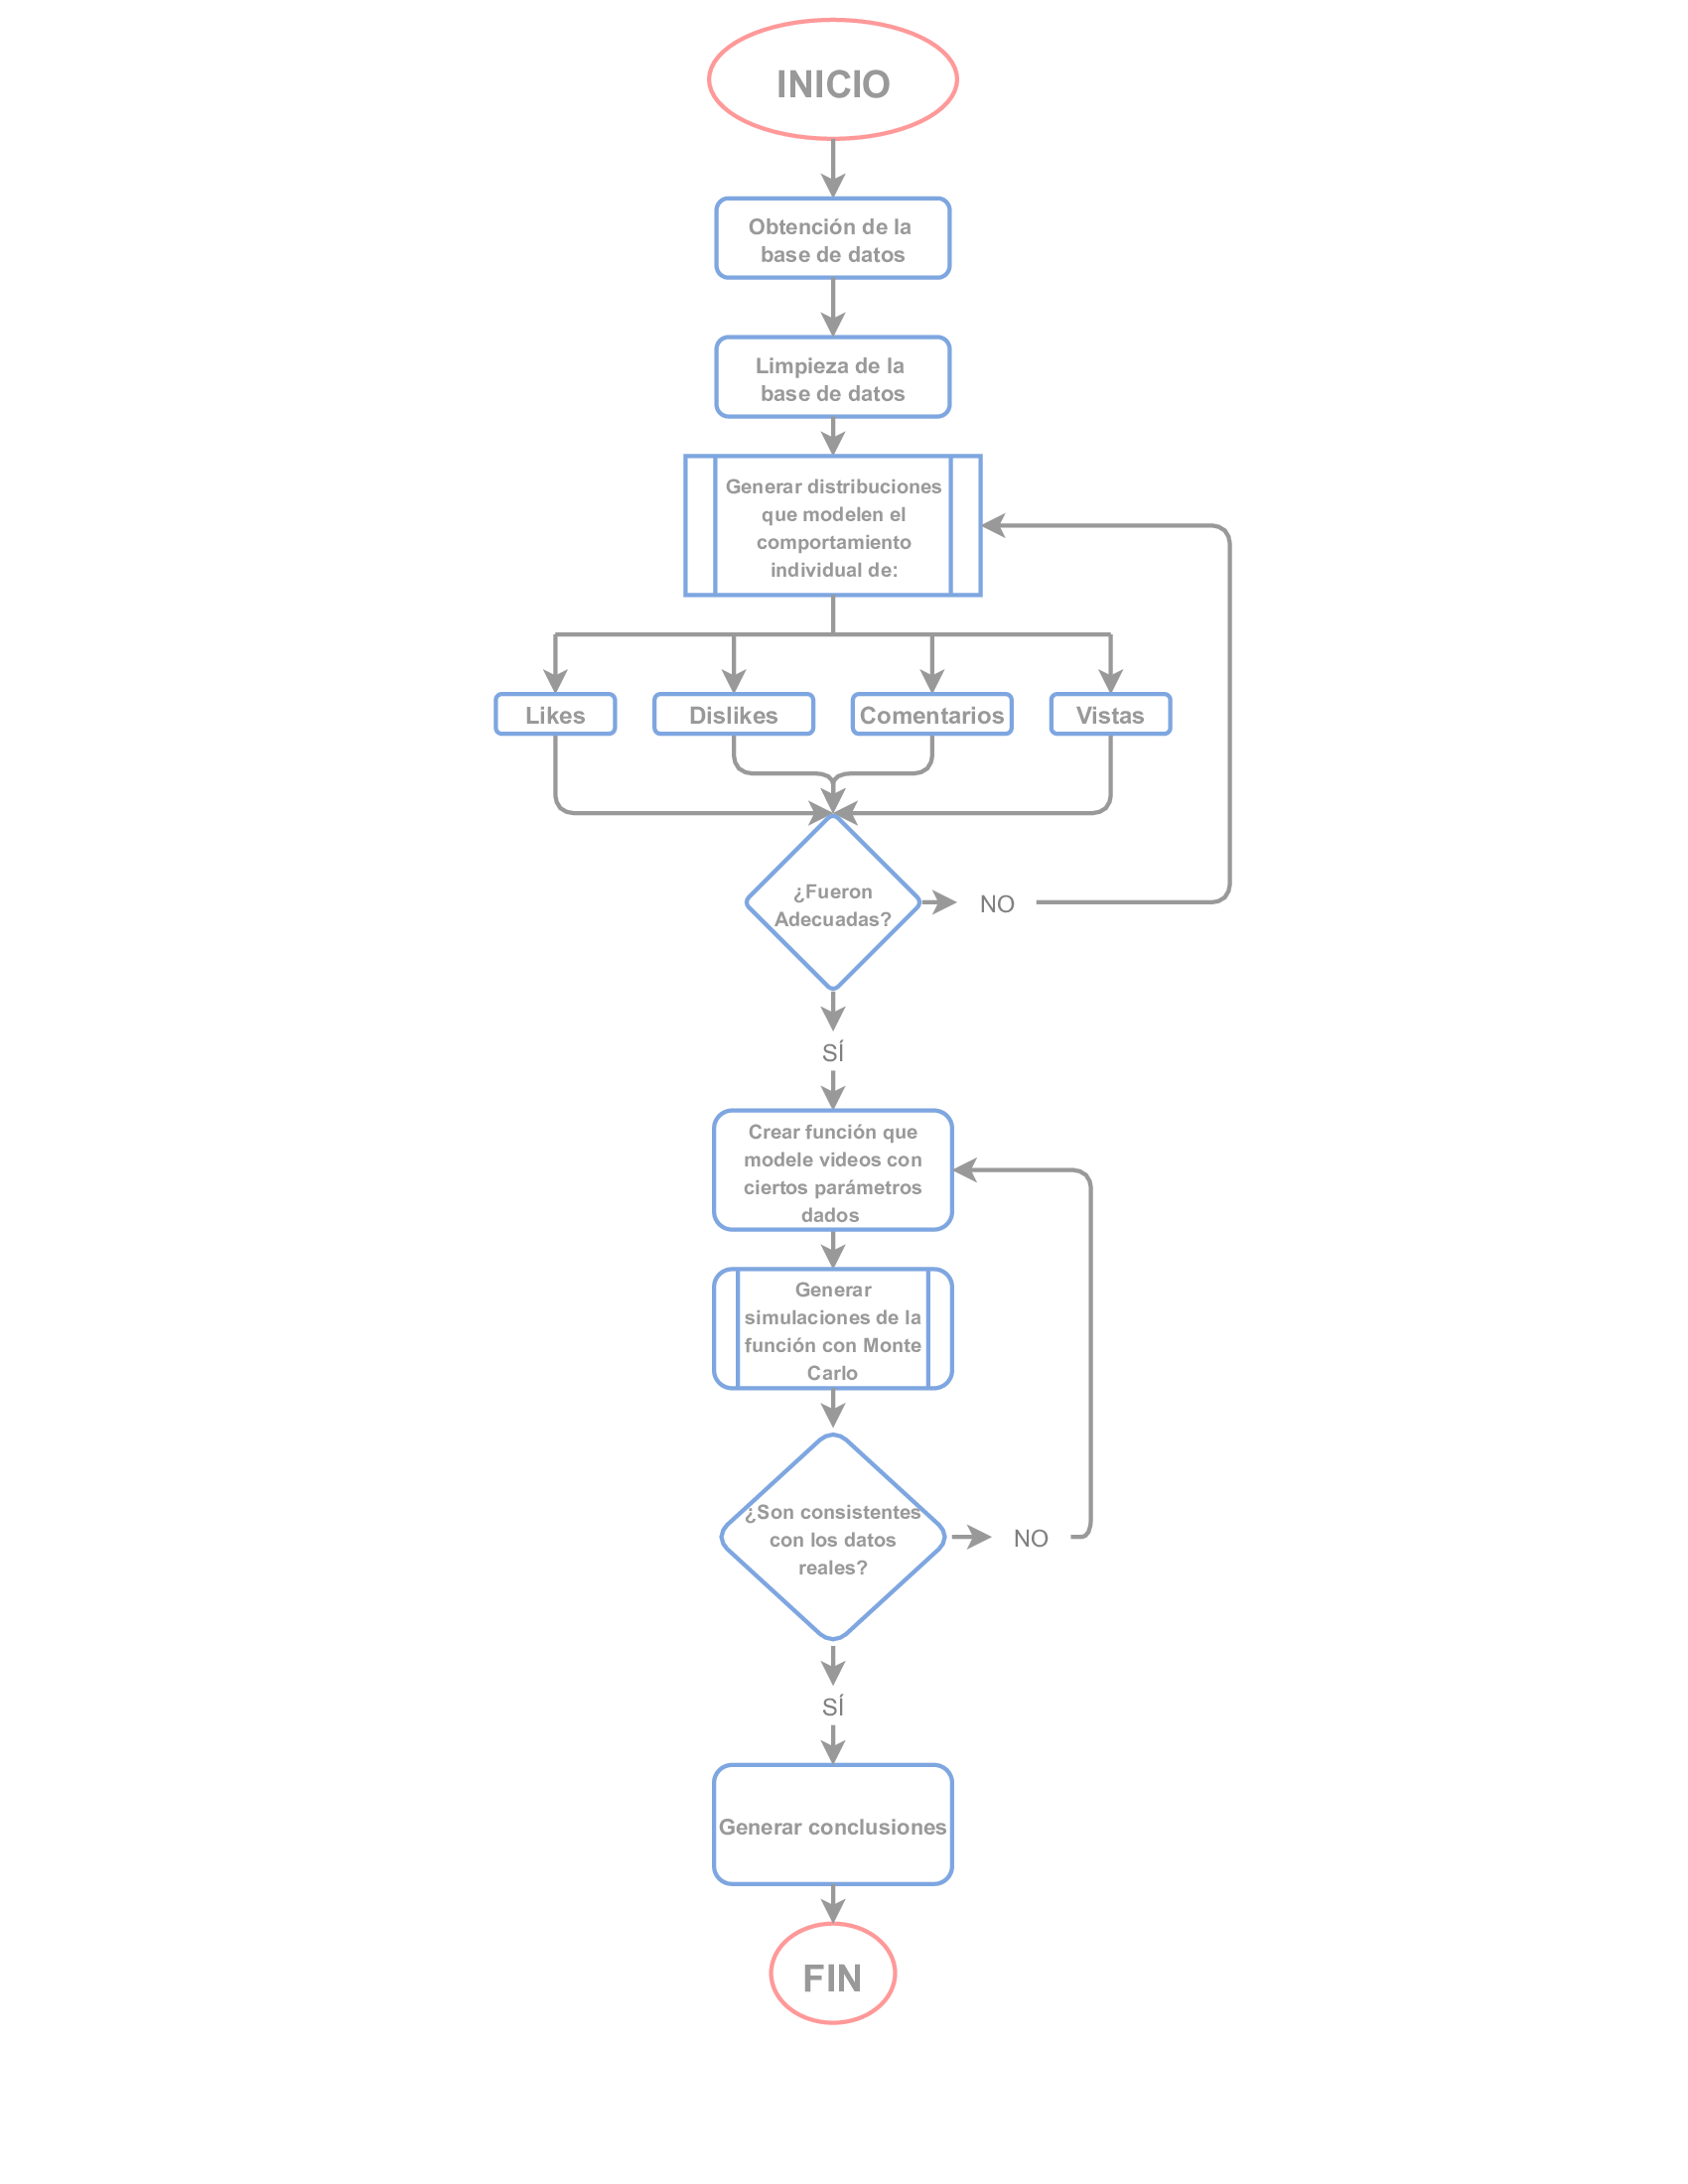

In [1]:
from IPython import display 
display.Image("./diagrama.png")

# <font color='midnightblue'> 4. Nodos/Variables a Simular

> Los nodos/variables que elegimos son:
> - Número de Vistas
> - Cantidad de Likes
> - Cantidad de Dislikes
> - Número de Comentarios

> Estos nodos fueron elegidos porque generamos la hipótesis de que intrínsecamente están correlacioandos y además se pueden simular ante el supuesto de un video ingresado en la red y su desempeño en la plataforma. La ratio entre likes y dislikes nos darán una muy buena idea de cómo se desempeña el video una vez en la plataforma. El número de vistas y sus respectivos comentarios afirmarán si este video está volviéndose popular.

# <font color='midnightblue'> 5. Definición de Hipótesis y Supuestos

> ###  <font color='midnightblue'> Hipótesis
>> Con base en la **Ley de los Grandes Números**, nuestra primer hipótesis es que a partir de una muestra de 20-30% de los datos, es posible generar Variables Aleatorias Distribuidas como X mejor distribución que se ajustan lo mejor posible a los datos reales.
    
>> La segunda, es que existe una cierta dependencia/correlación entre los nodos o variables que decidimos analizar, por lo que hacemos la suposición de que sus principales distribuciones aproximadas, serán muy parecidas.
    
> ###  <font color='midnightblue'> Supuestos
>> - La categoría del video no influye en los resultados del video.
>> - Los resultados de los videos no han sido modificados con algún tipo de bot/publicidad.
>> - Se tomará las 3 categorías con mayor frecuencia como las más populares.
    

# <font color='midnightblue'>6. Obtención de la Base de Datos

> Las bases de datos se obtuvieron directamente del sitio Kaggle, consta de un archivo .csv que contiene información sobre videos de YouTube México, esta información es representada en las siguientes categorías consideradas como las más importantes para este proyecto: 
- Número de Vistas
- Número de Comentarios
- Número de Likes
- Número de Dislikes

> Enlace al dataset: [YouTube Video Statistics](https://www.kaggle.com/datasnaek/youtube-new)

# <font color='midnightblue'> Funciones y Librerías

In [2]:
import warnings
import matplotlib
import numpy as np
import pandas as pd
from time import time
import seaborn as sns
import scipy.stats as st
from scipy import optimize
from IPython import display 
from CDIN import CDIN as eda
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from fitter import Fitter as ft
from collections import Counter
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

warnings.filterwarnings("ignore")
matplotlib.style.use('seaborn')

In [3]:
# -------------------- Función Para Obtener Histograma Junto con Distribuciones y su Respectivo Error --------------------
def distribuciones(data: 'datos',
                   dist: 'distribuciones',
                   b: 'bins'):  
    '''
    Función para probar distintas distribuciones,
    utiliza el Mean Squared Error
    ----------
    data: datos a ajustar
    dist: string o array de strings de distribuciones
    b: número de bins
    '''     
    global err, x, y, J 
    
    plt.figure(figsize = (16, 8))
    J = b    
    err = pd.DataFrame(index = dist, columns = ['MSE'])   
    y, x,  _ = plt.hist(data, bins = b, density = True)    
    x = x[1:]  #Para tener mismo shape en x, y
    
    def ajuste_dist(dist):
        global params
        params = getattr(st, dist).fit(data)
        y_hat = getattr(st, dist).pdf(x, *params)
        err.loc[dist] = ((y - y_hat)**2).mean()
        plt.plot(x, y_hat, label = dist);
    
    [ajuste_dist(dist) for dist in dist_list]
      
    plt.legend()
    plt.show()

In [4]:
# -------------------- Función Para Muestreo Estratificado --------------------
def Muestreo_Estratificado(n: 'n de V.A'):
    """
    Función para el método de muestreo estratificado,
    con el objetivo de aplicar métodos de reducción de varianza
    ----------
    n: Número de V a estratificar
    """
    U2 = np.random.rand(n)
    i = np.arange(0, n)
    me = (U2 + i) / n
    return me

In [5]:
# -------------------- Función Para Método de Aceptación y Rechazo --------------------
def MAR(N:'Número de V.A',
        f:'Función',
        g:'Función que Mayora a f',
        a:'Rango Inferior',
        b:'Rango Superior',       
        vae:'n V.A a Estratificar'):

    '''
    Regresa N variables aleatorias de la distribución f
    usando el método de aceptación y rechazo visto en clase
    aplicando a la vez un método de reducción de varianza 
    (Muestreo Estratificado)
    ----------
    N: Número de V.A a generar
    f: Función a trabajar
    g: Función que mayora a f
    a: Rango Inferior
    b: Rango Superior
    vae: n V.A a Estratificar
    ''' 
    aceptados = 0
    j = 0
    x = np.zeros(N)
    
    while aceptados < N:
        if j == 0:
            R2_a = Muestreo_Estratificado(vae) 
        R2 = R2_a[j]
        R1 = np.random.uniform(a, b)
        f_x = f(R1) 
        g_x = g(R1)
        condition = R2 * g_x <= f_x
        [plt.plot(R1, R2*g_x, '.c') if condition else plt.plot(R1, R2*g_x, '1')] 
        
        if condition:
            x[aceptados] = R1
            aceptados += 1
        else:
            None
            
        j += 1
        if j == vae - 1: 
            j = 0
    
    plt.show()
    
    return x

In [6]:
# -------------------- Función Para MAR Simple ------------------
def Simple_MAR(f: "Función",
               mx: "Máximo de la funciónn",
               xx: "Linspace",
               N: 'n de V.A' = 500):   
    '''
    Regresa N variables aleatorias de la distribución f
    usando el método de aceptación y rechazo visto en clase
    No grafica, y no implementa MRV.
    ----------
    f: Función a trabajar
    mx: Máximo de la función
    xx: Linspace
    N: n de Variables Aleatorias
    ''' 
    
    a = xx[0]
    b = xx[-1]
    X = np.zeros(N)
    i = 0 
    while i < N:
        R2 = np.random.uniform(0, mx) 
        R1 = np.random.uniform(a, b, 1)
        if R2 < f(R1):
            X[i] = R1
            i+=1
    return X

In [7]:
# -------------------- Función Para Método Fitter --------------------
def fitter(data: 'datos',
           dist: 'distribuciones',
           t: 'interrupción', 
           b: 'bins'):
    '''
    Función para método fitter
    ----------
    data: datos a ajustar
    dist: string o array de strings de distribuciones
    t: tiempo hasta la interrupción de la prueba para la distribución en curso
    b: número de bins
    '''    
    global f
    f = ft(data, distributions = dist, timeout = t, bins = b)
    f.fit()

In [8]:
# -------------------- Función Para Generar V.A --------------------
def R_V_Gen(f:'Función',
            xx:'Linspace',
            data: 'Datos',
            rv:'n Random Variables',
            mx:'x Donde está el máximo de la función',
            va_rv: 'n de Variables a aplicar método de reducción de varianza'):
    
    global max_f
    '''
    Función para generar V.A con MAR y reducción de varianza (muestreo estratificado)
    ----------
    f: Función a trabajar
    xx: Espacio en el eje x del histograma
    data: Datos
    rv: Número de V.A
    mx: 'x Donde está el máximo de la función'
    va_rv: 'n de Variables a aplicar método de reducción de varianza'
    '''
   
    max_f = f(optimize.fmin(lambda x: -f(x), mx, disp=False))
    
    g = lambda x: max_f
    g_2 = lambda x: max_f * np.ones([len(x)])
    
    plt.plot(xx, f(xx), label = 't(x)')
    plt.plot(xx, g_2(xx), label = 'g(x)')
    plt.legend(loc = 'best')
    
    random_values = MAR(rv, f, g, np.min(data), np.max(data), va_rv)
    
    return random_values

In [9]:
# -------------------- Función Para Método Kolmogorov - Smirnov --------------------
def kol_smir_test(data: 'Datos',
                  dist: 'Distribuciones'):     
    '''
    Función para método Kolmogorov - Smirnov
    ----------
    data: Datos a ajustar
    dist: String o array de strings de distribuciones
    '''  
    param = getattr(st, dist).fit(data)   
    return st.kstest(data, dist, args = (param))

In [10]:
# -------------------- Función Para Método KDE Multivariate --------------------
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  
                          var_type='c', **kwargs)
    return lambda x: kde.pdf([x])

In [11]:
# -------------------- Función Para Método KDE Univariate --------------------
def kde_statsmodels_u(x, x_grid, bandwidth, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels"""
    kde = KDEUnivariate(x)
    kde.fit(bw = bandwidth, **kwargs)
    return lambda x: kde.evaluate(x)

In [12]:
# -------------------- Función Histograma KDE Multivariate--------------------
def KDEM_f(data:'Datos',
          x:'Linspace',
          J:'Bins'):
    
    '''
    Función para crear histograma y figura de la posible función 
    que se ajusta a los datos con KDE Multivariado
    ----------
    data: Datos a ajustar
    x: Espacio en el eje x del histograma
    J: Número de bins para el histograma
    '''
    
    f = kde_statsmodels_m(data, x)
    
    plt.hist(data, bins = J, density = True)
    plt.plot(x, f(x), label = 'Función f')
    plt.legend(loc = 'best')
    plt.show()
    
    return f

In [13]:
# -------------------- Función Histograma KDE Univariate--------------------
def KDEU_f(data:'Datos',
           x:'Linspace',
           J:'Bins',
           bandwidth:'Bandwidth'):
    
    '''
    Función para crear histograma y figura de la posible función 
    que se ajusta a los datos con KDE univariado.
    ----------
    data: Datos a ajustar
    x: Espacio en el eje x del histograma
    J: Número de bins para el histograma
    bandwidth: Bandwidth xD
    '''
    
    f = kde_statsmodels_u(data, x, bandwidth)
    
    plt.hist(data, bins = J, density = True)
    plt.plot(x, f(x), label = 'Función f')
    plt.legend(loc = 'best')
    plt.show()
    
    return f

In [14]:
# -------------------- Función para método Q-Q --------------------
def qq(data:'Datos',
       dist:'Distribución'):
    
    '''
    Función para método Q-Q
    ----------
    data: datos a ajustar
    dist: string o array de strings de distribuciones
    ''' 
    
    fig, ax = plt.subplots(1, 1, figsize = [14, 6])
    grap_1 = sm.qqplot(data, dist=getattr(st, dist), line = 'q', fit = True, ax = ax)

In [15]:
# -------------------- Función BandWidth --------------------
def BW(data:'Datos', 
       a:'inicio linspace' = .1,
       b:'fin linspace' = 1,
       num:'N de muestras a generar (para linspace)' = 20,
       cv: 'n Cross Validation ' = 5):
    
    '''
    Función para encontrar el bandwidth
    ----------
    data: datos a trabajar
    a: 'inicio linspace'
    b: 'fin linspace'
    num: 'n de muestras con linspace'
    cv: 'n de Cross Validation'
    '''
       
    grid = GridSearchCV(KernelDensity(),
                        {'bandwidth': np.linspace(a, b, num)},
                        cv = cv) 
    
    grid.fit(data[:, None])
    return grid.best_params_

In [16]:
def error(VR: 'Valor Real',
          VA: 'Valor Aproximado'):
    
    '''
    Función para calcular el error porcentual
    ----------
    VR: Valor real de los datos
    VA: Valor aproximado
    ''' 
    
    error = np.abs(((VA-VR)/VR)*100)
    return error

# <font color='midnightblue'> Limpieza del Dataset

In [17]:
mx = pd.read_csv('MXvideos.csv')
mx.shape

(40451, 16)

In [18]:
# ----------------------- Eliminar Columnas -----------------------
mx.drop(['trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description'], inplace=True, axis=1)

In [19]:
# ----------------------- Aplicar EDA (Exporatory Data Analysis) -----------------------
eda.dqr(mx)

,Nombre,data_types,missing_values,present_values,unique_values,min,max
video_id,video_id,object,0,40451,33513,#NAME?,zzxLG6R5cHI
category_id,category_id,int64,0,40451,16,1,43
views,views,int64,0,40451,35915,157,100912384
likes,likes,int64,0,40451,14564,0,4470923
dislikes,dislikes,int64,0,40451,3693,0,1353667
comment_count,comment_count,int64,0,40451,6310,0,905925


In [20]:
# ----------------------- Mostrar Duplicados de 'video_id' -----------------------
print(mx[mx.duplicated(subset = ['video_id'])]) #mx[~] para mostrar opuesto

          video_id  category_id    views   likes  dislikes  comment_count
70          #NAME?           22    57070    6158       118            518
86          #NAME?           22     9409      24         2              3
219    _OXDcGPVAa4           26  1746221   93269      1792          10285
233    hcY52MFWMDM           25   263352     846       393            452
258         #NAME?           17   478507    1508       133            523
...            ...          ...      ...     ...       ...            ...
40419       #NAME?           24    13385     166         8             18
40420  WGOi_1XBclQ           10  4233617  436609     11240          56709
40426  TXTIMp7En-Q           25    78139    3118      1226           1896
40429  L6JFnZ5WabM           24   141734    5012       207           1294
40447  i7r_kMbyngk           25   121674    3558        58            491

[6938 rows x 6 columns]


In [21]:
# ----------------------- Crear df sin 'video_id' repetidos -----------------------
df = mx[~mx.duplicated(subset = ['video_id'])]

In [22]:
# ----------------------- Comprobar -----------------------
(df['video_id'].unique()).shape

(33513,)

In [23]:
# ----------------------- Comprobar -----------------------
Counter(df["video_id"].duplicated())

Counter({False: 33513})

In [24]:
# ----------------------- Identificar Columnas con Valores = 0 -----------------------
index_names = df[(df['likes'] == 0) | (df['dislikes'] == 0 ) | (df['comment_count'] == 0 )].index
index_names

Int64Index([    7,    32,    88,    89,   120,   139,   146,   157,   184,
              188,
            ...
            40053, 40075, 40131, 40136, 40160, 40193, 40361, 40399, 40428,
            40433],
           dtype='int64', length=1548)

In [25]:
Counter(df['dislikes'] == 0)

Counter({False: 32621, True: 892})

In [26]:
# ----------------------- Eliminarlos -----------------------
df.drop(index_names, inplace = True)

In [27]:
# ----------------------- Tamaño Final del Dataset -----------------------
df.shape

(31965, 6)

In [29]:
# ----------------------- Aplicar ln a las Columnas -----------------------
df['views'] = np.log(df['views'])
df['likes'] = np.log(df['likes'])
df['dislikes'] = np.log(df['dislikes'])
df['comment_count'] = np.log(df['comment_count'])

In [30]:
# ----------------------- Aplicar exp a las Columnas (Valor Real) -----------------------

# df['views'] = np.exp(df['views']) #.astype(int)
# df['likes'] = np.exp(df['likes']) 
# df['dislikes'] = np.exp(df['dislikes'])
# df['comment_count'] = np.exp(df['comment_count'])
# df.head()

In [31]:
# plt.figure(figsize=(16,8))
# plt.style.use('seaborn-pastel')

# plt.subplot(2,2,1)
# plt.hist(df['views'], bins = 30)
# plt.title('Views')

# plt.subplot(2,2,2)
# plt.hist(df['comment_count'], bins = 30)
# plt.title('Comments')

# plt.subplot(2,2,3)
# plt.hist(df['likes'], bins = 30)
# plt.title('Likes')

# plt.subplot(2,2,4)
# plt.hist(df['dislikes'], bins = 30)
# plt.title('Dislikes');

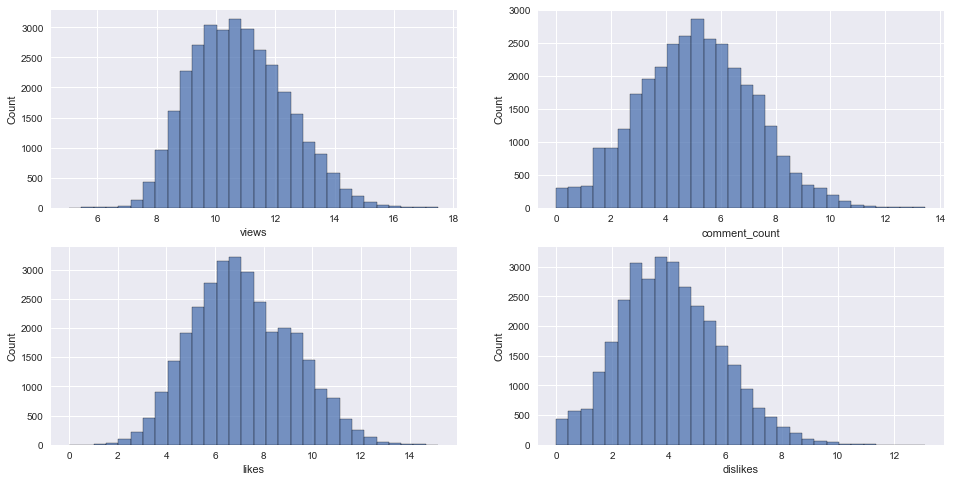

In [32]:
# ----------------------- Ver Forma Real de los Datos -----------------------
fig, ax = plt.subplots(2, 2, figsize=(16,8))

sns.histplot(df['views'], ax=ax[0,0], bins = 30)
sns.histplot(df['comment_count'], ax=ax[0,1], bins = 30)
sns.histplot(df['likes'], ax=ax[1,0], bins = 30)
sns.histplot(df['dislikes'], ax=ax[1,1], bins = 30);

# <font color='midnightblue'> Simulación nodo 3: Dislikes

In [33]:
nodo3 = df['dislikes']

In [34]:
np.random.seed(10)
muestra_n3 = np.random.choice(nodo3, 10000)

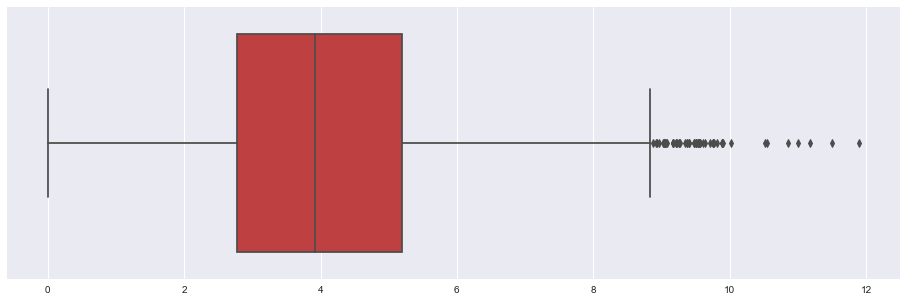

In [35]:
fig, ax1 = plt.subplots(figsize=(16, 5))
sns.boxplot(muestra_n3, ax = ax1, saturation=.5, color='r', fliersize=5);

## <font color='midnightblue'> - Prueba con Función Creada Para los Datos originales

In [36]:
# -------------------- Distribuciones Seleccionadas Específicamente Para Este Nodo --------------------
dist_list = ['gumbel_r', 'kstwobign', 'maxwell', 'rayleigh', 'beta', 'chi', 'nakagami']

In [37]:
# dist_continu = [d for d in dir(st) if isinstance(getattr(st, d), st.rv_continuous)]
# dist_discrete = [d for d in dir(st) if isinstance(getattr(st, d), st.rv_discrete)]

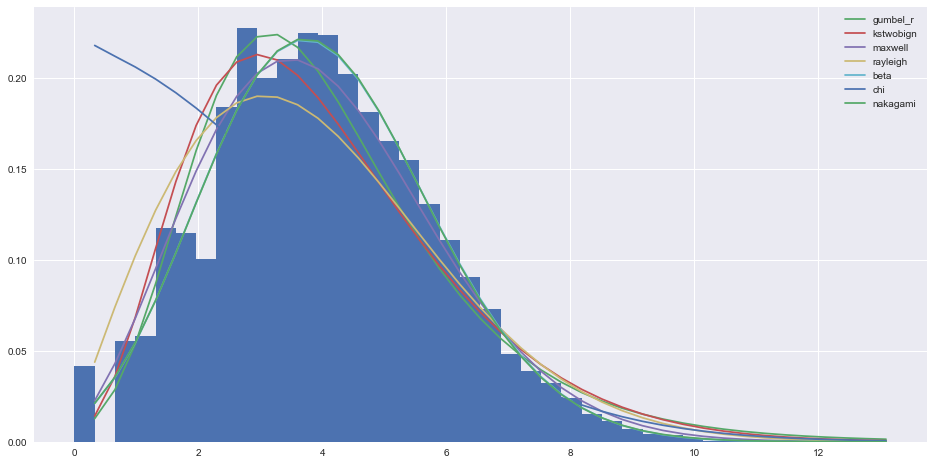

Wall time: 1.77 s


In [38]:
%%time
distribuciones(nodo3, dist_list, 40)

In [39]:
# -------------------- Top 5 Distribuciones Para 'Dislikes' --------------------
err.sort_values(by = 'MSE')

,MSE
beta,0.000200032
nakagami,0.000201062
maxwell,0.000366728
gumbel_r,0.000619992
kstwobign,0.000806404
rayleigh,0.000960212
chi,0.00544532


In [40]:
best = err.sort_values(by = 'MSE').head(3).index.values
best

array(['beta', 'nakagami', 'maxwell'], dtype=object)

## <font color='midnightblue'> - Prueba con Método Fitter Para la Muestra de 10,000 Datos del Nodo Real

Wall time: 747 ms


,sumsquare_error,aic,bic,kl_div
beta,0.005226,228.127577,-144608.448592,0.014010
nakagami,0.005250,224.732983,-144571.598644,0.014067
maxwell,0.008762,209.717424,-139458.616636,0.024873
gumbel_r,0.014271,192.840328,-134580.545070,0.057841
kstwobign,0.020167,193.834799,-131122.092074,0.064036


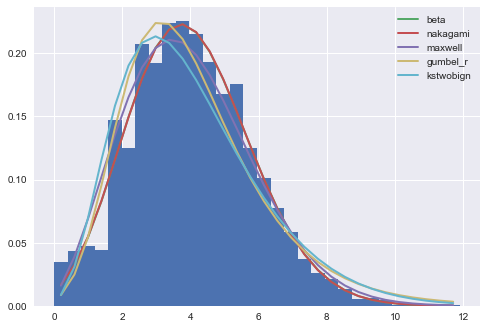

In [41]:
%%time
fitter(muestra_n3, dist_list, 15, 30)
f.summary()

#### <font color='midnightblue'> Conclusión Para Distribuciones con la Función Creada y Método Fitter:
    
> Las mejores distribuciones para los datos reales son : **Beta, Nakagami y Maxwell**, para la muestra: **Beta, Nakagami y Maxwell**. Haremos varias pruebas para comprobar.

In [42]:
best_dist = ['beta', 'nakagami', 'maxwell']

## <font color='midnightblue'> - Prueba Q-Q Para la Distribución Beta

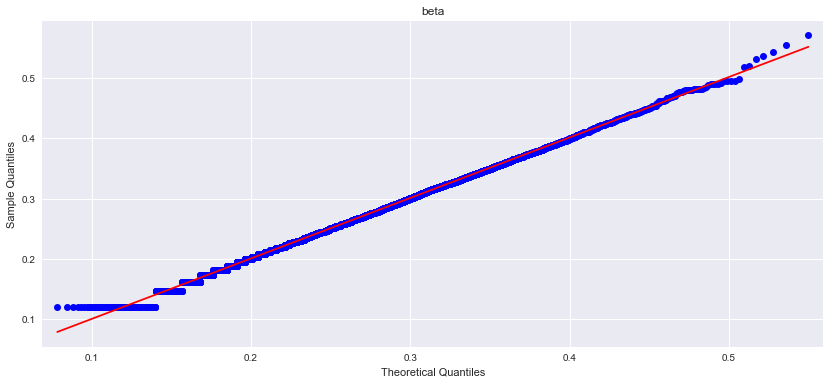

In [43]:
qq(muestra_n3, best_dist[0]) 
plt.title(best_dist[0]);

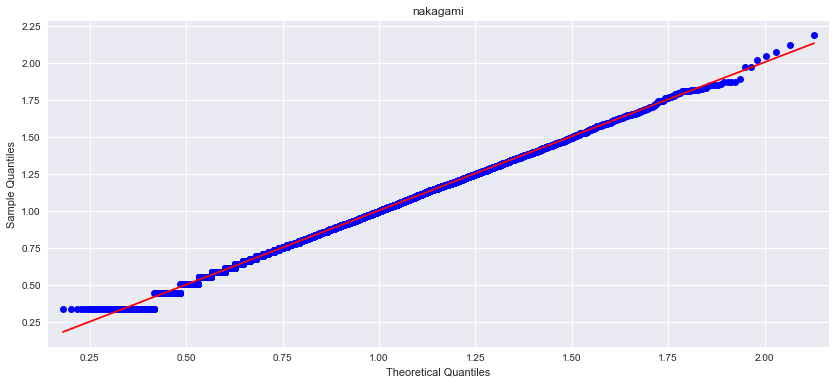

In [44]:
qq(muestra_n3, best_dist[1])
plt.title(best_dist[1]);

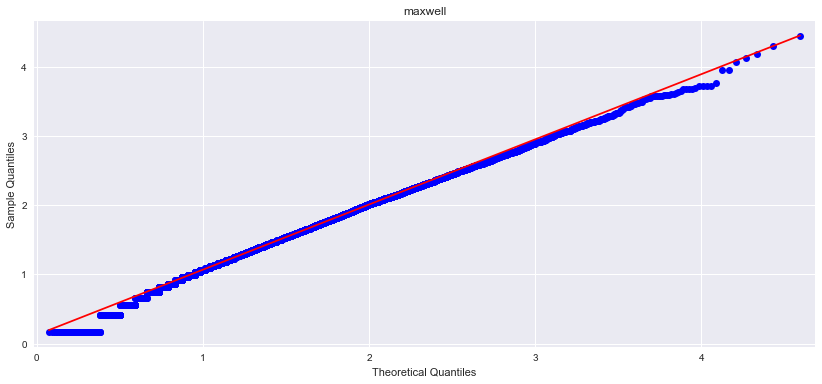

In [45]:
qq(muestra_n3, best_dist[2])
plt.title(best_dist[2]);

> A pesar de aplicar la prueba Q-Q a 3 distribuciones, los resultados muestran una pequeña incongruencia en la cola izquierda, para las 3 distribuciones. Procederemos con la $\chi^2$ y la prueba de Kolmogorov - Smirnov.

## <font color='midnightblue'> - Prueba de la Chi Cuadrada $\chi^2$ Para la Distribución Beta
    
#### <font color='midnightblue'> Hipótesis Nula $H_0$:
la distribución es Beta
#### <font color='midnightblue'> Hipótesis Alterna $H_a$:
La distribución no es Beta

In [46]:
mu_r = nodo3.mean()
sigma_r = nodo3.std()
param = getattr(st, 'beta').fit(nodo3)

In [47]:
mu_r, sigma_r

(4.020014995550215, 1.7878869312978714)

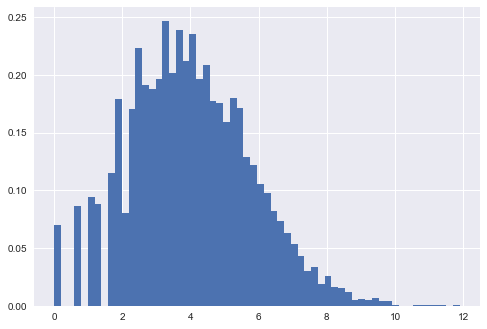

media mu = 5.852185, desviación estándar muestral = 3.435550


In [48]:
J = 60
y, x, _ = plt.hist(muestra_n3, J, density=True)
plt.show()

# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Media y desviación estándar muestral
mu = np.mean(x)
sigma = np.std(x)
print('media mu = %f, desviación estándar muestral = %f'%(mu, sigma))

In [49]:
pi = st.beta.pdf(x, param[0], param[1], param[2], param[3])

# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, y)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(y, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 4 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)
print('Media muestral = ', mu, '\nDesviación estándar muestral = ', sigma)

Valor de chi cuadrado teorico  =  inf
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=inf, pvalue=0.0)
Estadístico de chi_cuadrado =  73.31149302908324
Media muestral =  5.852184864568481 
Desviación estándar muestral =  3.4355503749361627


#### <font color='midnightblue'> Conclusión Método Chi Cuadrada $\chi^2$:
> <font color='midnightblue'> El pvalue no es suficientemente grande. Damos como inválida la $H_0$

## <font color='midnightblue'> - Kolmogorov - Smirnov Para las Mejores 3 Distribuciones
#### <font color='midnightblue'>Fijamos un Nivel de Confianza de 99%. Entonces, si pvalue es menor a .01, el ajuste no será apropiado.
#### <font color='midnightblue'> Hipótesis Nulas $H_0$:

In [50]:
h0 = ['$H_0$ = La PDF es {}'.format(dist) for dist in best_dist]
h0

['$H_0$ = La PDF es beta',
 '$H_0$ = La PDF es nakagami',
 '$H_0$ = La PDF es maxwell']

#### <font color='midnightblue'> Hipótesis Alternas $H_a$:

In [51]:
ha = ['$H_a$ = La PDF no es {}'.format(dist) for dist in best_dist]
ha

['$H_a$ = La PDF no es beta',
 '$H_a$ = La PDF no es nakagami',
 '$H_a$ = La PDF no es maxwell']

In [52]:
top_kol_smir = [kol_smir_test(muestra_n3, dist) for dist in best]

In [53]:
top_kol_smir

[KstestResult(statistic=0.01334247002859365, pvalue=0.05634496539604694),
 KstestResult(statistic=0.013636469264511689, pvalue=0.048070095467418805),
 KstestResult(statistic=0.03916540816925376, pvalue=9.160016294779879e-14)]

### <font color='midnightblue'> Conclusión Método Kolmogorov - Smirnov:
> <font color='midnightblue'> Ningún pvalue es suficientemente grande como para aceptar su hipótesis Nula, entonces las rechazamos.

## <font color='midnightblue'> - Estimación de función para MDAR con KDE

In [54]:
xg = np.linspace(min(muestra_n3), max(muestra_n3), 1000)

**Por cuestiones de ahorro de tiempo, dejamos SS de la función para estimar bandwidth**, aún así decidimos no hacer caso y proponer nosotros una.

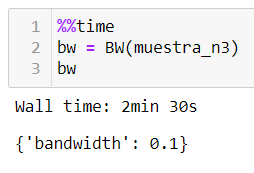

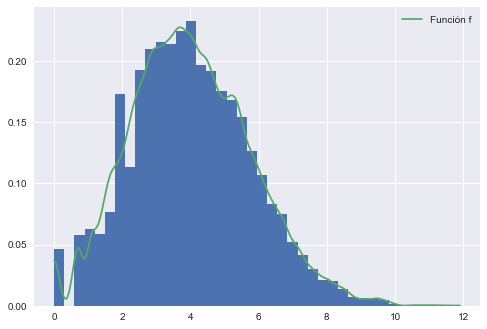

Wall time: 451 ms


In [55]:
%%time
f = KDEU_f(muestra_n3, xg, 40, .15)

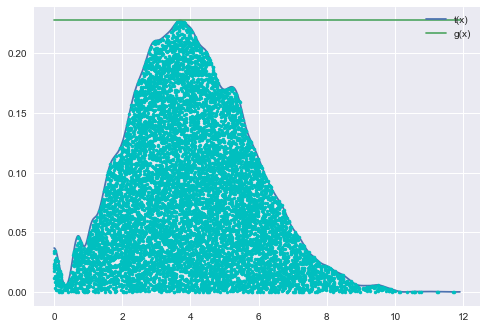

Wall time: 1min 28s


In [56]:
%%time
V_A_10000 = R_V_Gen(f, xg, muestra_n3, 10000, 4, 2000)

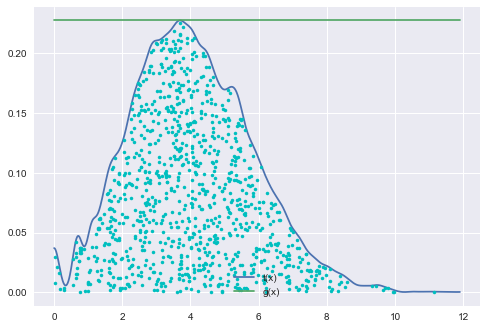

Wall time: 9.71 s


In [57]:
%%time
V_A_1000 = R_V_Gen(f, xg, muestra_n3, 1000, 4, 200)

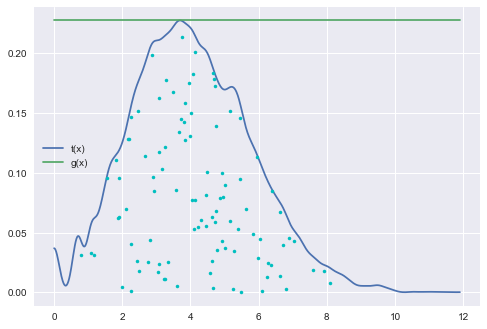

Wall time: 1.27 s


In [58]:
%%time
V_A_100 = R_V_Gen(f, xg, muestra_n3, 100, 4, 20)

In [59]:
# -------------------- Media para MAR con MRV --------------------
mu_MAR_MRV = [np.mean(np.exp(V_A_10000)), np.mean(np.exp(V_A_1000)), np.mean(np.exp(V_A_100))]
mu_MAR_MRV

[380.1956977515271, 414.1992972033821, 232.52218951949553]

In [60]:
# -------------------- Std para MAR con MRV --------------------
std_MAR_MRV = [np.std(np.exp(V_A_10000)), np.std(np.exp(V_A_1000)), np.std(np.exp(V_A_100))]
std_MAR_MRV

[2568.444570830279, 2624.7214236782115, 494.82823577708297]

In [61]:
# -------------------- Media Real --------------------
real_mean_N3 = np.mean(np.exp(nodo3))
real_mean_N3

367.8531518848741

In [62]:
# -------------------- Std Real --------------------
real_std_N3 = np.std(np.exp(nodo3))
real_std_N3

3494.342025472172

In [63]:
# -------------------- Error Media de MAR con MRV --------------------
error_M_MAR_N3 = [error(real_mean_N3, mu_MAR_MRV[i]) for i in range(3)]
error_M_MAR_N3

[3.3552915894318205, 12.599088816021034, 36.78939861516606]

In [64]:
# -------------------- Error Std de MAR con MRV --------------------
error_STD_MAR_N3 = [error(real_std_N3, std_MAR_MRV[i]) for i in range(3)]
error_STD_MAR_N3

[26.497047166319703, 24.886533586432574, 85.83915849765108]

## <font color='midnightblue'> - Monte Carlo

In [65]:
%%time
# -------------------- Monte Carlo 10k --------------------
MC_10000 = np.array([Simple_MAR(f, max_f, xg, 10) for i in range(1000)])
MC_10000 = [np.exp(MC_10000[i]) for i in range(len(MC_10000))]
MC_10000 = np.concatenate(MC_10000)

Wall time: 5.86 s


In [66]:
%%time
# -------------------- Monte Carlo 1k --------------------
MC_1000 = np.array([Simple_MAR(f, max_f, xg, 10) for i in range(100)])
MC_1000 = [np.exp(MC_1000[i]) for i in range(len(MC_1000))]
MC_1000 = np.concatenate(MC_1000)

Wall time: 620 ms


In [67]:
%%time
# -------------------- Monte Carlo 100 --------------------
MC_100 = np.array([Simple_MAR(f, max_f, xg, 10) for i in range(10)])
MC_100 = [np.exp(MC_100[i]) for i in range(len(MC_100))]
MC_100 = np.concatenate(MC_100)

Wall time: 62.4 ms


In [68]:
mu_MC = [np.mean(MC_10000), np.mean(MC_1000), np.mean(MC_100)]
mu_MC

[356.0919204454219, 331.3805923005764, 244.5864804334065]

In [69]:
std_MC_MRV = [np.std(MC_10000), np.std(MC_1000), np.std(MC_100)]
std_MC_MRV

[2558.5729050712484, 1873.6671979546015, 733.7746051456062]

In [70]:
error_M_MC_N3 = [error(real_mean_N3, mu_MC[i]) for i in range(3)]
error_M_MC_N3

[3.1972626520087664, 9.914978136632199, 33.50974996947858]

In [71]:
error_STD_MC_N3 = [error(real_std_N3, std_MC_MRV[i]) for i in range(3)]
error_STD_MC_N3

[26.779551445725403, 46.379971270802464, 79.0010651562806]

## <font color='midnightblue'> - Intervalo de Confianza Para la Media de los Datos

In [72]:
R_stats_N3 = np.round(np.exp(df['dislikes']))

In [73]:
# Intervalo de confianza usando t-student
i1 = st.t.interval(.99, len(R_stats_N3)-1, loc=np.mean(R_stats_N3), scale=st.sem(R_stats_N3))
# Intervalo de confianza usando distribución normal
i2 = st.norm.interval(.99, loc=np.mean(R_stats_N3), scale=st.sem(R_stats_N3))
print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s     ' %(.99,i1))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(.99,i2))

Con una confianza de 0.99 la media estará en el intervalo t,
 (317.505657231267, 418.2006465384812)     
Con una confianza de 0.99 la media estará en el intervalo normal,
 (317.5086637117705, 418.19764005797765)


## <font color='midnightblue'> - Comparación Con Datos Reales

In [74]:
res_N3 = pd.DataFrame(columns = ['Mean', 'Error %', 'std', 'Error %'])
res_N3.index.name = 'Método'

In [75]:
res_N3.loc['MAR ME 10000'] = mu_MAR_MRV[0], error_M_MAR_N3[0], std_MAR_MRV[0], error_STD_MAR_N3[0]                     
res_N3.loc['MAR ME 1000'] = mu_MAR_MRV[1], error_M_MAR_N3[1], std_MAR_MRV[1], error_STD_MAR_N3[1]
res_N3.loc['MAR ME 100'] = mu_MAR_MRV[2], error_M_MAR_N3[2], std_MAR_MRV[2], error_STD_MAR_N3[2]

res_N3.loc['Monte Carlo 10000'] = mu_MC[0], error_M_MC_N3[0], std_MC_MRV[0], error_STD_MC_N3[0]
res_N3.loc['Monte Carlo 1000'] = mu_MC[1], error_M_MC_N3[1], std_MC_MRV[1], error_STD_MC_N3[1]
res_N3.loc['Monte Carlo 100'] = mu_MC[2], error_M_MC_N3[2], std_MC_MRV[2], error_STD_MC_N3[2]

In [76]:
res_N3

,Mean,Error %,std,Error %
Método,,,,
MAR ME 10000,380.195698,3.355292,2568.444571,26.497047
MAR ME 1000,414.199297,12.599089,2624.721424,24.886534
MAR ME 100,232.522190,36.789399,494.828236,85.839158
Monte Carlo 10000,356.091920,3.197263,2558.572905,26.779551
Monte Carlo 1000,331.380592,9.914978,1873.667198,46.379971
Monte Carlo 100,244.586480,33.509750,733.774605,79.001065


In [77]:
np.round(R_stats_N3.describe())

count     31965.0
mean        368.0
std        3494.0
min           1.0
25%          16.0
50%          50.0
75%         182.0
max      483969.0
Name: dislikes, dtype: float64

In [78]:
stats_N3_MAR = pd.Series(np.exp(V_A_10000))
np.round(stats_N3_MAR.describe())

count     10000.0
mean        380.0
std        2569.0
min           1.0
25%          16.0
50%          51.0
75%         190.0
max      125652.0
dtype: float64

In [79]:
stats_MC = pd.Series(MC_10000)
np.round(stats_MC.describe())

count     10000.0
mean        356.0
std        2559.0
min           1.0
25%          16.0
50%          50.0
75%         176.0
max      129346.0
dtype: float64

In [80]:
DescripcionN3 = pd.DataFrame(columns = ['Estadístico', 'Reales', 'MAR y Estratos', 'Monte Carlo'])

In [81]:
DescripcionN3['Estadístico'] = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

In [82]:
DescripcionN3['Reales'] = np.round(R_stats_N3.describe()).values
DescripcionN3['MAR y Estratos'] = np.round(stats_N3_MAR.describe()).values
DescripcionN3['Monte Carlo'] = np.round(stats_MC.describe()).values

In [83]:
DescripcionN3

,Estadístico,Reales,MAR y Estratos,Monte Carlo
0,count,31965.0,10000.0,10000.0
1,mean,368.0,380.0,356.0
2,std,3494.0,2569.0,2559.0
3,min,1.0,1.0,1.0
4,25%,16.0,16.0,16.0
5,50%,50.0,51.0,50.0
6,75%,182.0,190.0,176.0
7,max,483969.0,125652.0,129346.0


# <font color='midnightblue'> - Conclusiones Nodo 3: Dislikes
    
> Empezando la tarea de encontrar la o las distribuciones que mejor s eajustan, no encontramos problemas mayores. Nos apoyamos con la gráfica que incluye todas las distribuciones de la paquetería y seleccionamos las que más se ajustan. Cabe recalcar que de acuerdo al menor error, la distribución Beta está presenta también en este nodo.
    
> En cuento a la prueba Q-Q, las 3 distribuciones seleccionadas presentaban el mismo detalle: una pequeña inconguencia en la cola izquierda de los datos.

> Para la prueba de la Chi Cuadrada, tampoco se obtuvo solución al la prueba de Hipótesis, por lo que pasamos a probar con Kolmogorov-Smirnov, cuyo resultado tampoco fue positivo para nuestras distribuciones. Finalmente, se optó por el uso de un Kernel Density Estimation.

> En el caso de este nodo, no nos funcionaba el KDE Multivariado y se implementó el Univariado, que además nos redujo tiempos de cómputo, y además usamos una función para calcular el bandwidth, pero por cuestiones de tiempo y resultados no se utilizó el BW sugerido.
    
> Se hicieron simulaciones con 10,000. 1,000 y 100 datos aleatorios con el Método de Aceptación y Rechazo y Monte Carlo. Los resultados fueron satisfactorios en algunos casos.
    
> Con el MAR se implementó implicitamente un Método de Reducción de Varianza (Estratos) y sorprendentemente, los resultados fueron mejores con las 1,000 variables, contrario a lo que se esperaba de que fuera mejor con las 10,000. **Explicar**.
    
> Con Monte Carlo, sí fue consistente con el aumento de número de variables generadas. 
    
> El intervalo de confianza para la Media es: (317.50, 418.20) Y los resultados con MAR y MC sen la mayoría de los casos son consistentes con esto. 
    
> Se podría afirmar que con una muestra de un tercio (1/3) parte de los datos originales, es posible modelar y crear datos que sean consistentes con los datos reales. Afirmamos así nuestra hipótesis de la **Ley de los Grandes Números**.

# <font color='midnightblue'> Simulación nodo 4: Comment Count

In [84]:
nodo4 = df['comment_count']

In [85]:
np.random.seed(10)
muestra_n4 = np.random.choice(nodo4, 10000)

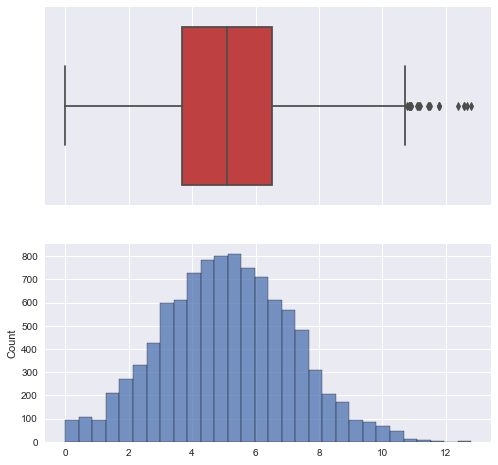

In [86]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex= True,figsize=(8,8))
sns.histplot(muestra_n4, ax=ax2, bins=30)
sns.boxplot(x=muestra_n4, ax=ax1, saturation=.5, color='r');

## <font color='midnightblue'> - Prueba con Función Creada Para los Datos originales

In [87]:
# -------------------- Distribuciones Seleccionadas Específicamente Para Este Nodo --------------------
dist_list = ['gumbel_r', 'kstwobign', 'maxwell', 'rayleigh', 'rice', 'beta', 'chi', 'nakagami']

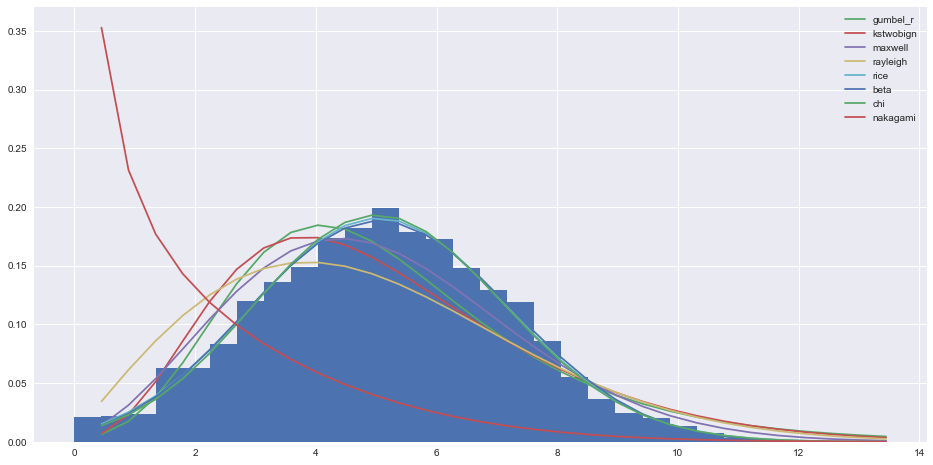

Wall time: 2.91 s


In [88]:
%%time
distribuciones(nodo4, dist_list, 30)

In [89]:
# -------------------- Top 5 Distribuciones Para 'Likes' --------------------
err.sort_values(by = 'MSE')

,MSE
beta,0.000108047
rice,0.000119182
chi,0.000124571
maxwell,0.000521691
gumbel_r,0.000785794
kstwobign,0.00100848
rayleigh,0.00121321
nakagami,0.0121086


In [90]:
best = err.sort_values(by = 'MSE').head(3).index.values
best

array(['beta', 'rice', 'chi'], dtype=object)

## <font color='midnightblue'> - Prueba con Método Fitter Para la Muestra de 10,000 Datos del Nodo Real

Wall time: 1.15 s


,sumsquare_error,aic,bic,kl_div
rice,0.001078,208.605633,-160398.608735,inf
beta,0.001131,214.966776,-159916.483310,inf
chi,0.001195,208.756540,-159375.616711,inf
maxwell,0.009631,190.896774,-138512.515948,inf
gumbel_r,0.015844,187.390000,-133534.582541,inf


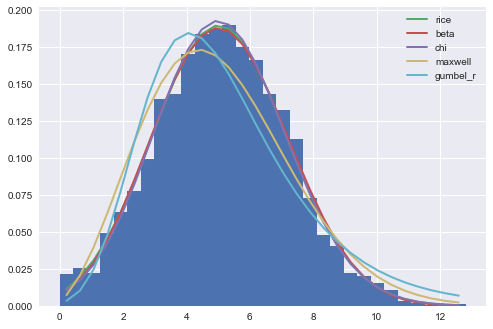

In [91]:
%%time
fitter(muestra_n4, dist_list, 15, 30)
f.summary()

#### <font color='midnightblue'> Conclusión Para Distribuciones con la Función Creada y Método Fitter:
 
> Gracias a este método se puede comprobar el error en las distintas distribuciones de un método diferente, a diferencia de los otros métodos que también nos permiten ver esto de forma visual. En el caso del nodo para las "Comment Count" apreciamos que las distribuciones $Rice$, $Beta$ y $Chi$ son las que mejor se ajustan y se mantienen constantes en ambos métodos.


In [92]:
best_dist = ['rice', 'beta', 'chi']

## <font color='midnightblue'> - Prueba Q-Q Para la Distribución Beta

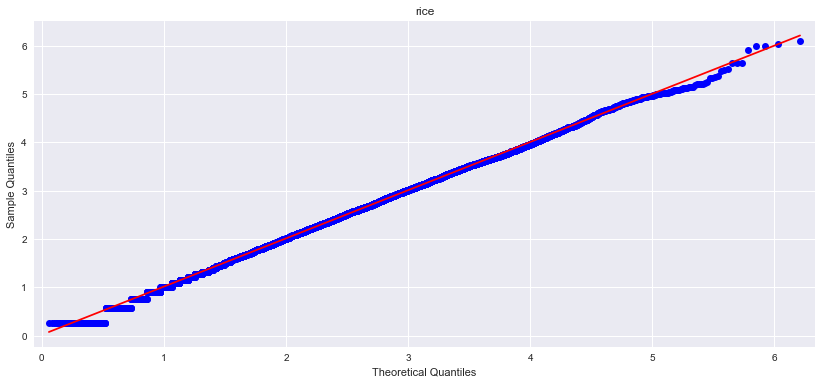

In [93]:
qq(muestra_n4, best_dist[0]) 
plt.title(best_dist[0]);

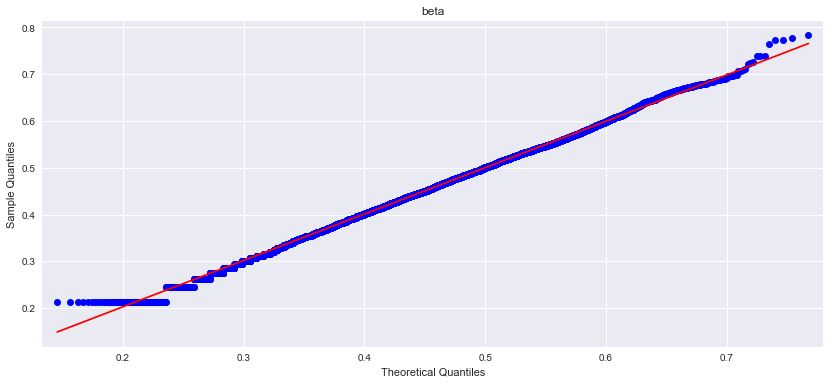

In [94]:
qq(muestra_n4, best_dist[1])
plt.title(best_dist[1]);

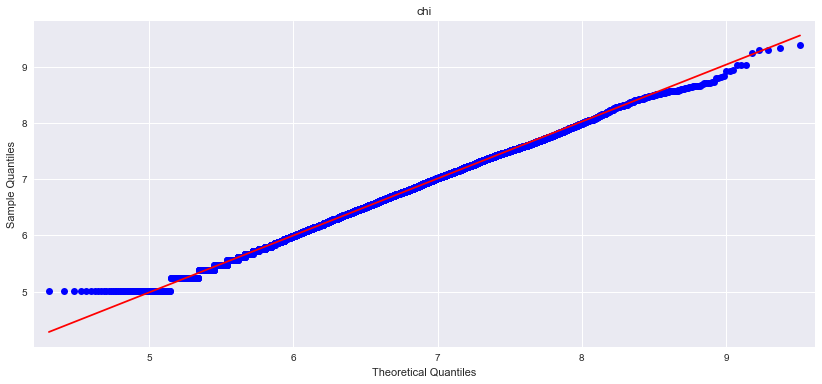

In [95]:
qq(muestra_n4, best_dist[2])
plt.title(best_dist[2]);

> La mayor (no tan grande) incongruencia en la prueba Q-Q está en la cola derecha, visible también en el diagrama de caja. El caso que menos diferencia tiene sería el $Rice$. La prueba $\chi^2$ y la prueba de Kolmogorov - Smirnov nos confirman o desmienten si este es el caso.

## <font color='midnightblue'> - Prueba de la Chi Cuadrada $\chi^2$ Para la Distribución Beta
    
#### <font color='midnightblue'> Hipótesis Nula $H_0$:
la distribución es Beta con "media= $\mu$" y "desviación estándar = $\sigma$"
#### <font color='midnightblue'> Hipótesis Alterna $H_a$:
La distribución no es Beta

In [96]:
mu_r = nodo4.mean()
sigma_r = nodo4.std()
param = getattr(st, 'beta').fit(nodo4)

In [97]:
mu_r, sigma_r

(5.114614720155334, 2.060653679610737)

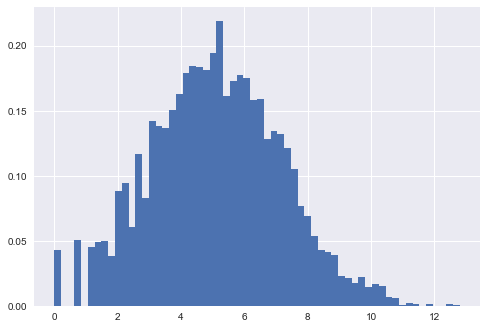

media mu = 6.294631, desviación estándar muestral = 3.695291


In [98]:
J = 60
y, x, _ = plt.hist(muestra_n4, J, density=True)
plt.show()

# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Media y desviación estándar muestral
mu = np.mean(x)
sigma = np.std(x)
print('media mu = %f, desviación estándar muestral = %f'%(mu, sigma))

In [99]:
pi = st.beta.pdf(x, param[0], param[1], param[2], param[3])

# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, y)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(y, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 4 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)
print('Media muestral = ', mu, '\nDesviación estándar muestral = ', sigma)

Valor de chi cuadrado teorico  =  inf
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=inf, pvalue=0.0)
Estadístico de chi_cuadrado =  73.31149302908324
Media muestral =  6.294631377947699 
Desviación estándar muestral =  3.695290509621955


#### <font color='midnightblue'> Conclusión Método Chi Cuadrada $\chi^2$:
> <font color='midnightblue'> El pvalue no es suficientemente grande. Damos como inválida la $H_0$

## <font color='midnightblue'> - Kolmogorov - Smirnov Para las Mejores 3 Distribuciones
#### <font color='midnightblue'>Fijamos un Nivel de Confianza de 99%. Entonces, si pvalue es menor a .01, el ajuste no será apropiado.
#### <font color='midnightblue'> Hipótesis Nulas $H_0$:

In [100]:
h0 = ['$H_0$ = La PDF es {}'.format(dist) for dist in best]
h0

['$H_0$ = La PDF es beta', '$H_0$ = La PDF es rice', '$H_0$ = La PDF es chi']

#### <font color='midnightblue'> Hipótesis Alternas $H_a$:

In [101]:
ha = ['$H_a$ = La PDF no es {}'.format(dist) for dist in best]
ha

['$H_a$ = La PDF no es beta',
 '$H_a$ = La PDF no es rice',
 '$H_a$ = La PDF no es chi']

In [102]:
top_kol_smir = [kol_smir_test(muestra_n4, dist) for dist in best]

In [103]:
top_kol_smir

[KstestResult(statistic=0.010161561540774175, pvalue=0.25138388173407156),
 KstestResult(statistic=0.00958139693282331, pvalue=0.31559894636495944),
 KstestResult(statistic=0.012571959577788214, pvalue=0.08404249536567188)]

### <font color='midnightblue'> Conclusión Método Kolmogorov - Smirnov:
> <font color='midnightblue'> Solo los pvalue de **Beta y rice** son mayores al nivel de significancia establecido, entonces podemos aceptar las 2 $H_0$. Sin embargo la PDF 'beta' es la que tiene mayor significancia.

> <font color='midnightblue'> Además, el resultado es consistente con el top de distribuciones con menor error.

## <font color='midnightblue'> - Estimación de función para MDAR con KDE

In [104]:
xg = np.linspace(min(muestra_n4), max(muestra_n4), 1000)

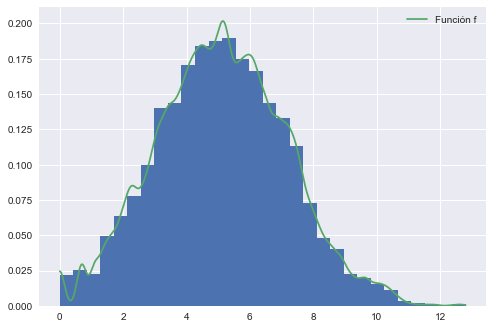

Wall time: 502 ms


In [105]:
%%time
f = KDEU_f(muestra_n4, xg, 30, 0.15) #El bandwidth es elegido por nosotros

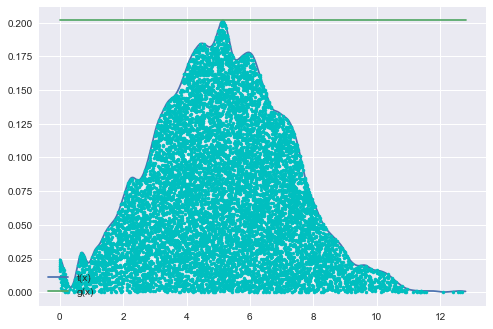

Wall time: 1min 28s


In [106]:
%%time
V_A_10000 = R_V_Gen(f, xg, muestra_n4, 10000, 5, 2000)

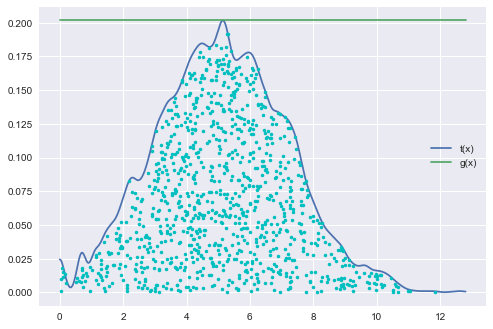

Wall time: 8.25 s


In [107]:
%%time
V_A_1000 = R_V_Gen(f, xg, muestra_n4, 1000, 5, 200)

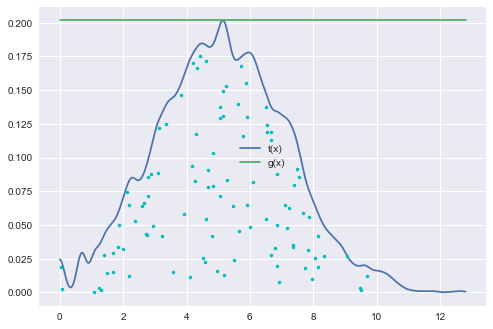

Wall time: 1.17 s


In [108]:
%%time
V_A_100 = R_V_Gen(f, xg, muestra_n4, 100, 5, 20)

In [109]:
# -------------------- Media para MAR con MRV --------------------
mu_MAR_MRV = [np.mean(np.exp(V_A_10000)), np.mean(np.exp(V_A_1000)), np.mean(np.exp(V_A_100))]
mu_MAR_MRV

[1363.8481228705457, 1632.6349349151424, 1077.74932489785]

In [110]:
# -------------------- Std para MAR con MRV --------------------
std_MAR_MRV = [np.std(np.exp(V_A_10000)), np.std(np.exp(V_A_1000)), np.std(np.exp(V_A_100))]
std_MAR_MRV

[7711.951769589569, 6806.181762688749, 2637.093783593031]

In [111]:
# -------------------- Media Real --------------------
real_mean_N4 = np.mean(np.exp(nodo4))
real_mean_N4

1365.1044892851558

In [112]:
# -------------------- Std Real --------------------
real_std_N4 = np.std(np.exp(nodo4))
real_std_N4

8412.167446069838

In [113]:
# -------------------- Error Media de MAR con MRV --------------------
error_M_MAR_N4 = [error(real_mean_N4, mu_MAR_MRV[i]) for i in range(3)]
error_M_MAR_N4

[0.09203445043741372, 19.59779985560522, 21.050049036010478]

In [114]:
# -------------------- Error Std de MAR con MRV --------------------
error_STD_MAR_N4 = [error(real_std_N4, std_MAR_MRV[i]) for i in range(3)]
error_STD_MAR_N4

[8.323843777116076, 19.091223441247653, 68.65143495419744]

## <font color='midnightblue'> - Monte Carlo

In [115]:
%%time
# -------------------- Monte Carlo 10k --------------------
MC_10000 = np.array([Simple_MAR(f, max_f, xg, 10) for i in range(1000)])
MC_10000 = [np.exp(MC_10000[i]) for i in range(len(MC_10000))]
MC_10000 = np.concatenate(MC_10000)

Wall time: 6.03 s


In [116]:
%%time
# -------------------- Monte Carlo 1k --------------------
MC_1000 = np.array([Simple_MAR(f, max_f, xg, 10) for i in range(100)])
MC_1000 = [np.exp(MC_1000[i]) for i in range(len(MC_1000))]
MC_1000 = np.concatenate(MC_1000)

Wall time: 612 ms


In [117]:
%%time
# -------------------- Monte Carlo 100 --------------------
MC_100 = np.array([Simple_MAR(f, max_f, xg, 10) for i in range(10)])
MC_100 = [np.exp(MC_100[i]) for i in range(len(MC_100))]
MC_100 = np.concatenate(MC_100)

Wall time: 64 ms


In [118]:
mu_MC = [np.mean(MC_10000), np.mean(MC_1000), np.mean(MC_100)]
mu_MC

[1420.1762298566134, 1282.597170748401, 763.2954824189989]

In [119]:
std_MC_MRV = [np.std(MC_10000), np.std(MC_1000), np.std(MC_100)]
std_MC_MRV

[8943.731406029865, 5435.168496000084, 1259.3582759297342]

In [120]:
error_M_MC_N4 = [error(real_mean_N4, mu_MC[i]) for i in range(3)]
error_M_MC_N4

[4.034250931245291, 6.044029536519965, 44.08519725704641]

In [121]:
error_STD_MC_N4 = [error(real_std_N4, std_MC_MRV[i]) for i in range(3)]
error_STD_MC_N4

[6.318989289833665, 35.38920223777294, 85.02932467757634]

## <font color='midnightblue'> - Intervalo de Confianza Para la Media de los Datos

In [122]:
R_stats_N4 = np.round(np.exp(df['comment_count']))

In [123]:
# Intervalo de confianza usando t-student
i1 = st.t.interval(.99, len(R_stats_N4)-1, loc=np.mean(R_stats_N4), scale=st.sem(R_stats_N4))
# Intervalo de confianza usando distribución normal
i2 = st.norm.interval(.99, loc=np.mean(R_stats_N4), scale=st.sem(R_stats_N4))
print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s     ' %(.99,i1))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(.99,i2))

Con una confianza de 0.99 la media estará en el intervalo t,
 (1243.8995378439688, 1486.3094407263427)     
Con una confianza de 0.99 la media estará en el intervalo normal,
 (1243.9067755491606, 1486.302203021151)


## <font color='midnightblue'> - Comparación Con Datos Reales

In [124]:
res_N4 = pd.DataFrame(columns = ['Mean', 'Error %', 'std', 'Error %'])
res_N4.index.name = 'Método'

In [125]:
res_N4.loc['MAR ME 10000'] = mu_MAR_MRV[0], error_M_MAR_N4[0], std_MAR_MRV[0], error_STD_MAR_N4[0]                     
res_N4.loc['MAR ME 1000'] = mu_MAR_MRV[1], error_M_MAR_N4[1], std_MAR_MRV[1], error_STD_MAR_N4[1]
res_N4.loc['MAR ME 100'] = mu_MAR_MRV[2], error_M_MAR_N4[2], std_MAR_MRV[2], error_STD_MAR_N4[2]

res_N4.loc['Monte Carlo 10000'] = mu_MC[0], error_M_MC_N4[0], std_MC_MRV[0], error_STD_MC_N4[0]
res_N4.loc['Monte Carlo 1000'] = mu_MC[1], error_M_MC_N4[1], std_MC_MRV[1], error_STD_MC_N4[1]
res_N4.loc['Monte Carlo 100'] = mu_MC[2], error_M_MC_N4[2], std_MC_MRV[2], error_STD_MC_N4[2]

In [126]:
res_N4

,Mean,Error %,std,Error %
Método,,,,
MAR ME 10000,1363.848123,0.092034,7711.951770,8.323844
MAR ME 1000,1632.634935,19.597800,6806.181763,19.091223
MAR ME 100,1077.749325,21.050049,2637.093784,68.651435
Monte Carlo 10000,1420.176230,4.034251,8943.731406,6.318989
Monte Carlo 1000,1282.597171,6.044030,5435.168496,35.389202
Monte Carlo 100,763.295482,44.085197,1259.358276,85.029325


In [127]:
np.round(R_stats_N4.describe())

count     31965.0
mean       1365.0
std        8412.0
min           1.0
25%          40.0
50%         167.0
75%         680.0
max      692356.0
Name: comment_count, dtype: float64

In [128]:
stats_N4_MAR = pd.Series(np.exp(V_A_10000))
np.round(stats_N4_MAR.describe())

count     10000.0
mean       1364.0
std        7712.0
min           1.0
25%          41.0
50%         165.0
75%         697.0
max      327159.0
dtype: float64

In [129]:
stats_MC = pd.Series(MC_10000)
np.round(stats_MC.describe())

count     10000.0
mean       1420.0
std        8944.0
min           1.0
25%          40.0
50%         163.0
75%         656.0
max      359014.0
dtype: float64

In [130]:
DescripcionN4 = pd.DataFrame(columns = ['Estadístico', 'Reales', 'MAR y Estratos', 'Monte Carlo'])

In [131]:
DescripcionN4['Estadístico'] = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

In [132]:
DescripcionN4['Reales'] = np.round(R_stats_N4.describe()).values
DescripcionN4['MAR y Estratos'] = np.round(stats_N4_MAR.describe()).values
DescripcionN4['Monte Carlo'] = np.round(stats_MC.describe()).values

In [133]:
DescripcionN4

,Estadístico,Reales,MAR y Estratos,Monte Carlo
0,count,31965.0,10000.0,10000.0
1,mean,1365.0,1364.0,1420.0
2,std,8412.0,7712.0,8944.0
3,min,1.0,1.0,1.0
4,25%,40.0,41.0,40.0
5,50%,167.0,165.0,163.0
6,75%,680.0,697.0,656.0
7,max,692356.0,327159.0,359014.0


# <font color='midnightblue'> - Conclusiones Nodo 4: Comment Count
    
> Las comprobación de las 3 mejores distribuciones (Beta, Chi, Rice) es consistente en todos los métodos implementados: Función creada, método fitter, prueba Q-Q y Kolmogorov-Smirnov. Con excepción de la distribución Beta la cual no tuvo suficiente precencia en la prueba Chi Cuadrada.

> Con una muestra de los datos reales nos fue posible generar V.A que son consistentes con los estadísticos del dataset original, entonces comprobamos la hipótesis de la Ley de los Grandes Números. Se tuvieron que cambiar varios procesos con el objetivo de reducir la carga computacional, esto resultó en la implementación de nuevas funciones. Se logró un análisis Montecarlo y la comparación de los errores entre metodos. 

> Lo que se puede observar es que para que un video genere tracción suficiente para ser considerado popular, este necesita alrededor de 1300 comentarios lo cual puede parecer obvio. Cabe resaltar que esto no significa que el video sea bien recibido, sin embargo, videos polémicos son más propensos a ser tendencia y popular en la plataforma.

# <font color='midnightblue'> Conclusiones Finales del Proyecto

> Dando respuesta a la primer Hipótesis General: Nos fue posible generar modelos y ajustarlos para que sean consistentes con los datos reales, con apenas un tamaño de muestra aproximado del 30% de los datos originales. Estos modelos son el **Método de Aceptación y Rechazo** que implementa un **Método de Reducción de Varianza** implicitamente, y **Monte Carlo**, ambos probados con 10,000. 1,000 y 100 datos. La comprobación de esto fue hecha con comparaciones a la par entre los Métodos y los datos reales, donde se comparan a partir de estos estadísticos:
Media, Desviación Estándar, Mínimo, 25%, 50%, 75% y el Máximo.

> En cuento a la segunda Hipótesis General: El top 3 de distribuciones para la muestra de 10,000 de los datos reales fue consistente con el top 3 de distribuciones para cada nodo con el total de datos. La distribución que más veces se repite fue la **Beta**, y si bien las pruebas hechas fallaron generalmente, el ajuste a la muestra de los datos con el método **Fitter** fue generalmente igual al de la función creada aplicada a los datos reales.

> Respecto a métodos, funciones creadas, librerías, implementación de temas vistos en clase, etc:
> Creemos que se hizo uso de la mayoría de temas vistos en clase, y reconocemos que nos faltó implementar ciertas cosas como más **Métodos de Reducción de Varianza**, hacer uso de las distribuciones con menor error, eficientar un poco más el código en ciertas partes, en fin, podemos concluir que todos y cada uno de los temas vistos hasta el **TEMA 2** son **eficientes, útiles y sobre todo aplicables realmente para casos como el del proyecto o parecidos.**

# <font color='midnightblue'> ANEXOS

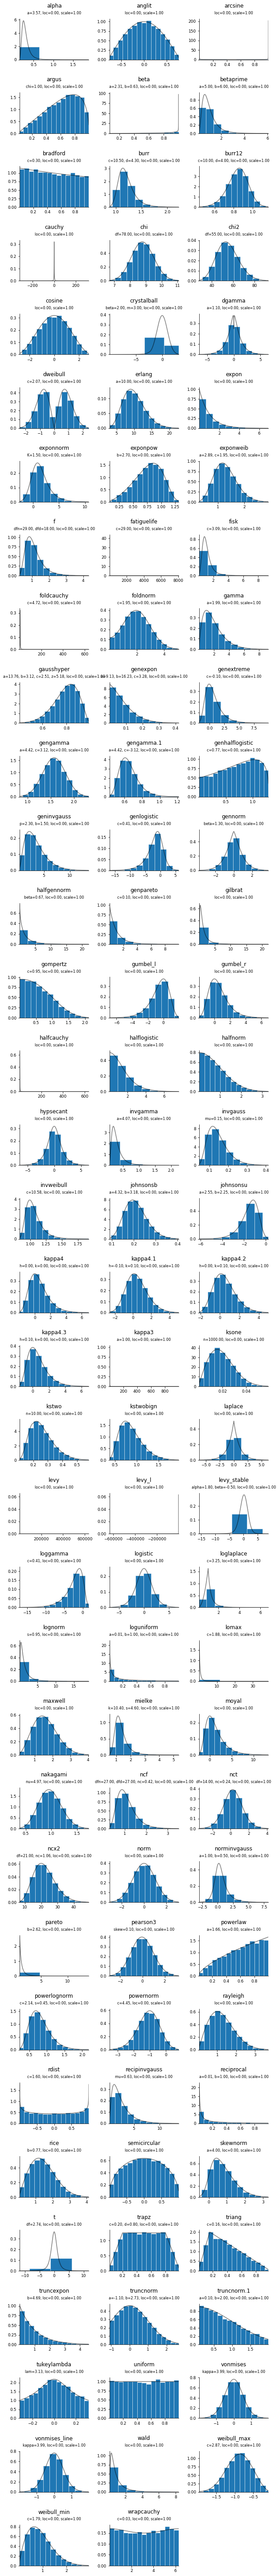

In [134]:
# ----------------------- Imagen de Distribuciones Continuas -----------------------
display.Image("./Distribuciones.png")

## <font color='midnightblue'> Fuentes Consultadas
> https://fitter.readthedocs.io/en/latest/index.html
    
> https://www.statology.org/kolmogorov-smirnov-test-python/
    
> https://github.com/odjaramilloz/SPF-2021-I.git
    
>
    
>   